### Load Data & Initial Validation

In [1]:
#pip install pandas

In [2]:
import pandas as pd
import numpy as np

# Load raw data
df = pd.read_csv("/workspaces/Task_09_Project/data/insurance.csv")

# Preview
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Basic structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Data Quality Assessment

#### Missing Values

In [4]:
df.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
(df.isna().mean() * 100).round(2)


age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

#### Inconsistencies & Encoding

In [6]:
df['sex'].value_counts()
df['smoker'].value_counts()
df['region'].value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [7]:
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### EDA

#### Summary Statistics

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.groupby("smoker")["charges"].describe()


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


### Visualizations

In [10]:
#pip install matplotlib !pip install seaborn


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    style="whitegrid",
    context="talk",
    palette="Set2"
)

plt.rcParams["figure.figsize"] = (10, 6)


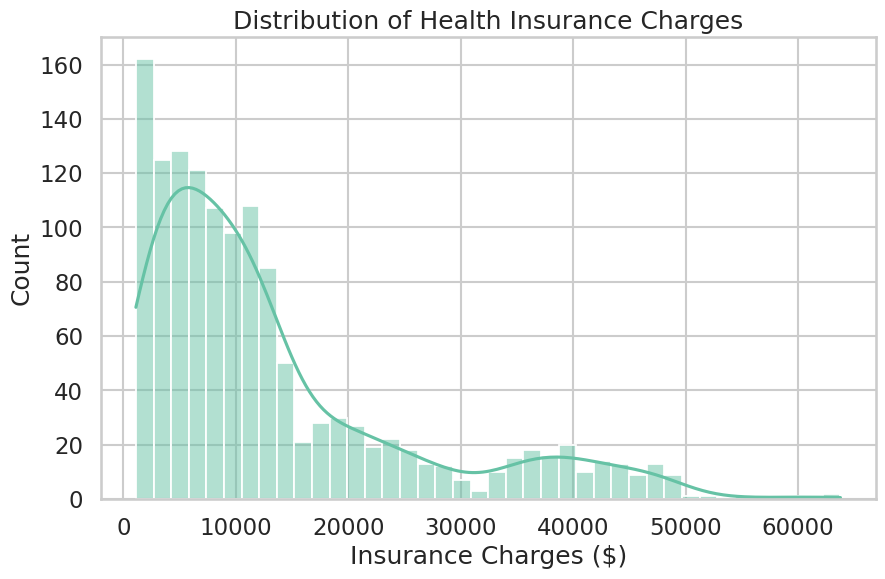

In [12]:
sns.histplot(df["charges"], bins=40, kde=True)
plt.title("Distribution of Health Insurance Charges")
plt.xlabel("Insurance Charges ($)")
plt.ylabel("Count")
plt.show()


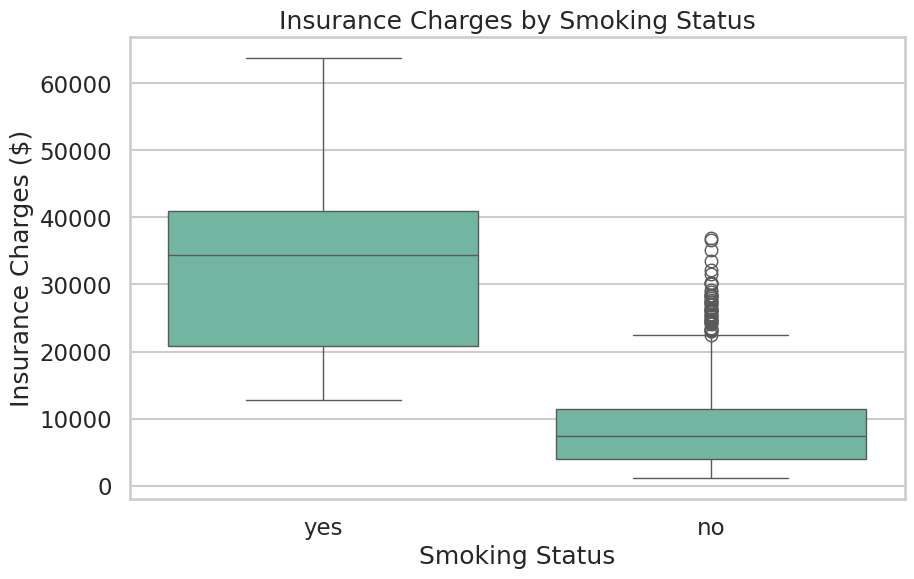

In [13]:
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Insurance Charges by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Insurance Charges ($)")
plt.show()
    

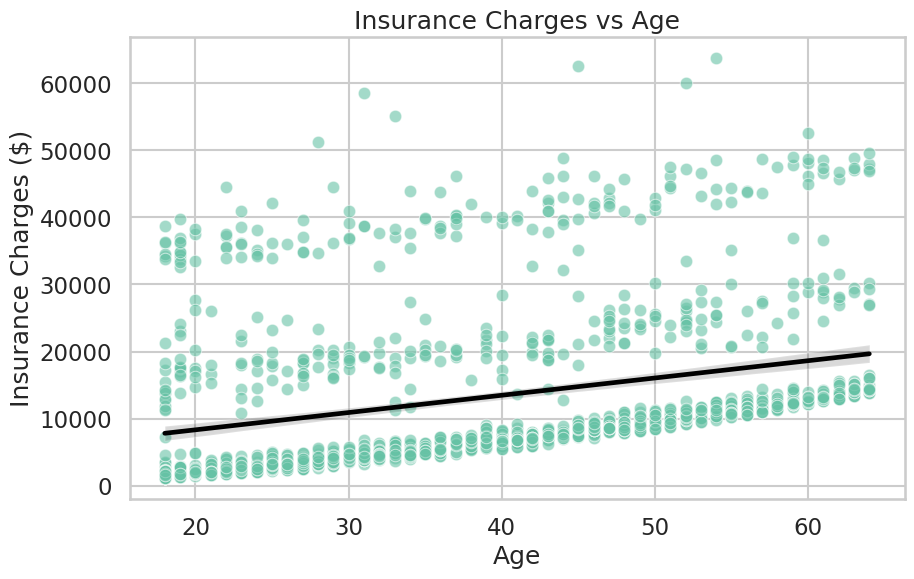

In [14]:
sns.scatterplot(x="age", y="charges", data=df, alpha=0.6)
sns.regplot(x="age", y="charges", data=df, scatter=False, color="black")
plt.title("Insurance Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Insurance Charges ($)")
plt.show()


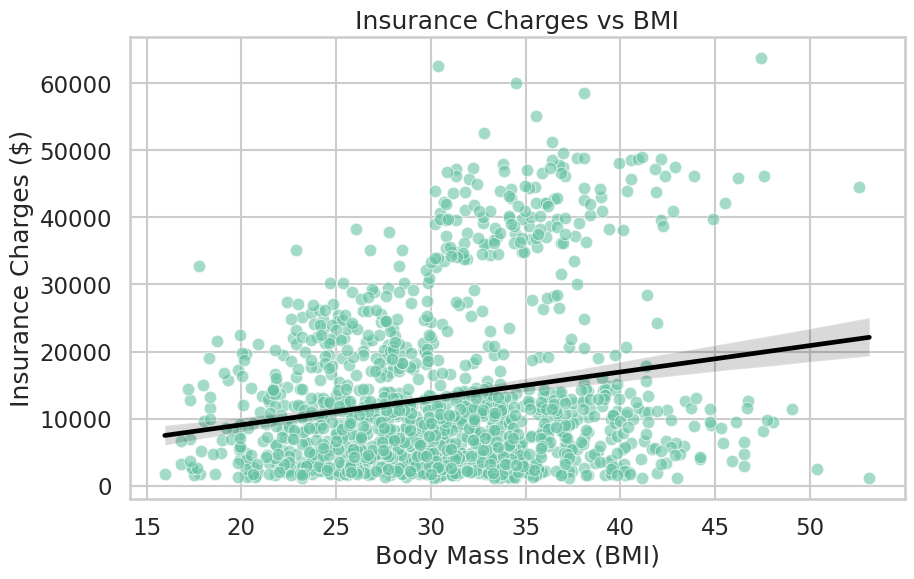

In [15]:
sns.scatterplot(x="bmi", y="charges", data=df, alpha=0.6)
sns.regplot(x="bmi", y="charges", data=df, scatter=False, color="black")
plt.title("Insurance Charges vs BMI")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Insurance Charges ($)")
plt.show()


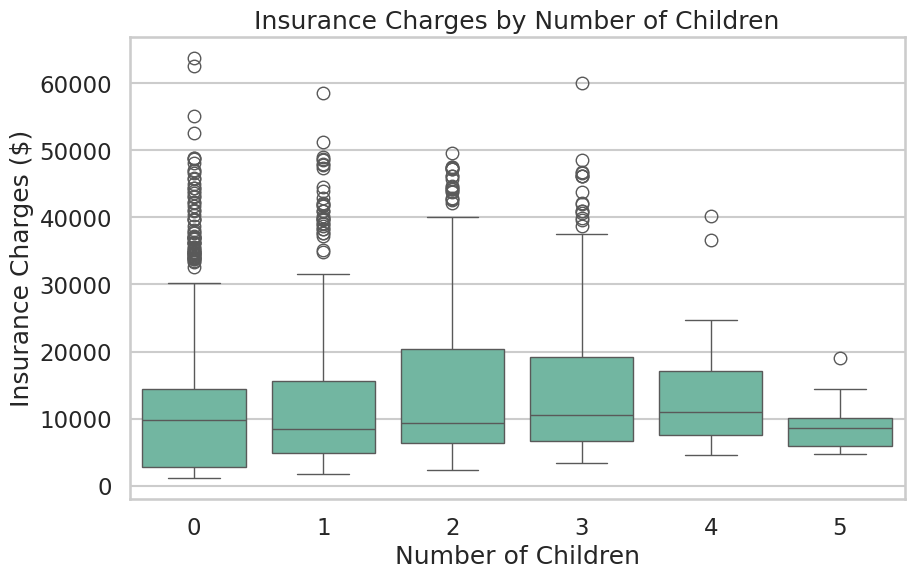

In [16]:
sns.boxplot(x="children", y="charges", data=df)
plt.title("Insurance Charges by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Insurance Charges ($)")
plt.show()
